In [62]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Получить функцию $f(t)$ как решение прямой задачи $\int\limits_a^b K(t - \tau) x(\tau) d\tau = f(t)$

Рассмотрим вариант 2

In [63]:
f_0 = 300
mu = 8e5
a = 0
b = 1e-2
N = 100
t_ax = np.linspace(a,b,N)

x_t = lambda t : np.cos(2 * np.pi * f_0 * t + mu * t**2)

beta = 3e3
A = 0.5
dt = 2e-3

kernel = lambda t : np.exp(- beta * t) + A * np.exp(- beta * t - dt)

In [64]:
def conv(kernel, func, t_ax):
    result = np.zeros(len(t_ax))
    K = kernel(t_ax)
    F = func(t_ax)[::-1]
    for i in range(len(t_ax)):
        result[i] = np.sum(K * np.roll(F, i + 1))
    return result

In [65]:
f_t = conv(kernel, x_t, t_ax)

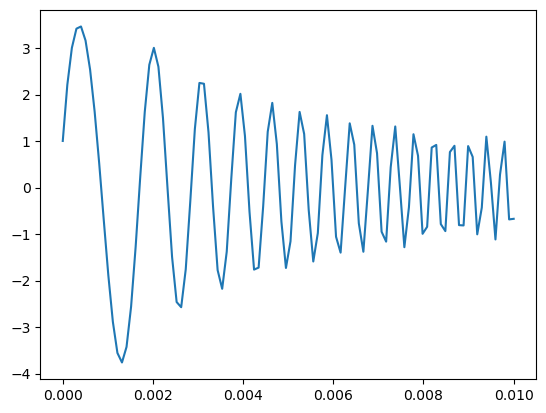

In [66]:
plt.plot(t_ax, f_t)

### Задание 2

Добавить белый шум

In [67]:
noise = np.random.normal(0, 1e-1, len(f_t))
f_d = f_t + noise

### Задание 3

Используя $f_\delta$ и $K(t)$ или $x(t)$ найти $x_\alpha (t)$ или $K_\alpha(t)$ соответственно через регуляризацию Тихонова, для этого зададим $m(\omega) = \omega^2$

In [81]:
#Фурье от правой части:
F_d = np.fft.fft(f_d)
kernel_ar = kernel(t_ax)
kernel_fft = np.fft.fft(kernel_ar)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
alpha = 1e-12

$$x_\alpha (\omega) = \dfrac{F_\delta(\omega)K^*(\omega)}{K^*(\omega)K(\omega) + \alpha m(\omega)}$$

In [82]:
m_ar = m_omega(freq_ax)
x_alpha_fft = (F_d * kernel_fft.conj()) / (kernel_fft.conj() * kernel_fft + alpha * m_ar)

In [83]:
x_alpha = np.fft.ifft(x_alpha_fft)

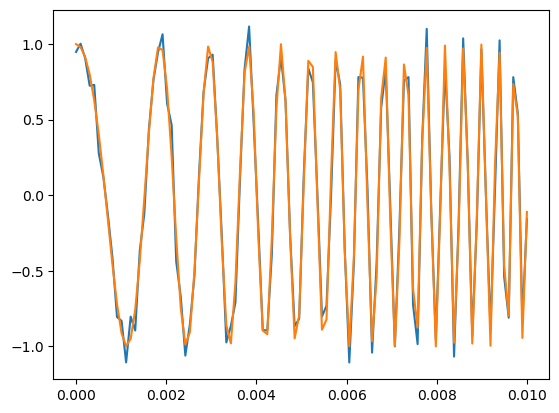

In [84]:
plt.plot(t_ax, x_alpha.real)
plt.plot(t_ax, x_t(t_ax))